In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
# Read the August 2012 power data from the data folder
df = pd.read_csv("../data/2012-08-power-survey-london.csv")
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,L_count,M_count,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma
0,2012-08-01 00:00:00,25.950,1.334,9.236,34.829,152.363,64.757,12.599,31.070,1.859,...,168,64,89,61,83,676,30,0.131030,3787,496.210
1,2012-08-01 00:30:00,21.089,1.065,9.076,33.489,162.238,59.739,12.568,28.441,1.820,...,168,64,88,60,83,676,30,0.134701,3788,510.246
2,2012-08-01 01:00:00,18.514,1.023,8.838,30.677,146.044,54.904,10.195,27.707,1.867,...,168,64,88,60,83,676,30,0.122509,3788,464.065
3,2012-08-01 01:30:00,18.354,1.030,7.930,29.277,132.142,52.409,9.803,28.605,1.873,...,168,64,88,60,83,673,30,0.113742,3785,430.514
4,2012-08-01 02:00:00,17.914,1.043,7.606,27.406,127.412,50.199,9.228,27.966,1.882,...,168,64,88,60,83,676,30,0.107919,3788,408.798


In [3]:
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"

# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)


In [4]:
# Create a plotting function to plot the energy consumption associated with a dataframe.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

In [5]:
# Create a dataframe representing energy consumption for August 8th 2012, the day
# of the Usain Bolt's  game.

df_Usain_8_05 = df.loc[df['day']==5]
df_Usain_8_05 = df_Usain_8_05.set_index(df_Usain_8_05["tstamp"])
df_Usain_8_05.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-08-05 00:00:00,21.586,1.464,14.703,40.121,170.999,69.918,14.150,38.336,2.989,...,88,60,83,676,30,0.143916,3792,545.730000,5,0:00
0:30,2012-08-05 00:30:00,20.538,1.167,10.804,35.444,170.988,62.103,12.276,33.784,2.240,...,89,60,82,676,30,0.142419,3795,540.478999,5,0:30
1:00,2012-08-05 01:00:00,18.638,1.173,10.516,33.743,158.434,58.475,11.271,32.550,1.944,...,89,60,82,676,30,0.131907,3795,500.587000,5,1:00
1:30,2012-08-05 01:30:00,20.171,0.995,9.368,28.898,141.589,57.552,11.630,28.857,2.062,...,89,60,82,676,30,0.119727,3795,454.365000,5,1:30
2:00,2012-08-05 02:00:00,19.305,1.169,7.966,28.025,135.557,54.444,10.617,27.717,2.083,...,89,60,82,676,30,0.112255,3795,426.007000,5,2:00


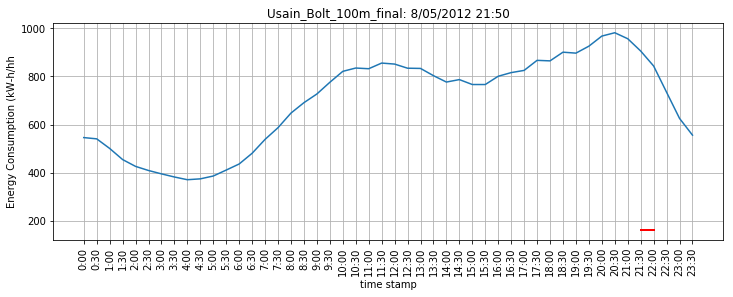

In [6]:
# Enter details for the Usain Bolt's 100 meter's final which took place on day 8th
# between 21.50 and 21.55 (approx).

dfevent = df_Usain_8_05
title   = "Usain_Bolt_100m_final: 8/05/2012 21:50"
tsb     = '21:30'
tse     = '22:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)